In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/crimedetails.csv",na_values=";")
print(df)

    Case Number                    Date         Primary Type  \
0      HN549294  08/25/2007 09:22:18 AM              ASSAULT   
1      JE240540  05/24/2021 03:06:00 PM             HOMICIDE   
2      JE279849  06/26/2021 09:24:00 AM             HOMICIDE   
3      JG507211  11/09/2023 07:30:00 AM             BURGLARY   
4      JG501049  11/12/2023 07:59:00 AM              BATTERY   
..          ...                     ...                  ...   
995    JG414584  09/07/2023 12:01:00 AM  MOTOR VEHICLE THEFT   
996    JG416803  09/07/2023 01:34:00 PM   DECEPTIVE PRACTICE   
997    JG415669  09/07/2023 08:30:00 PM              BATTERY   
998    JG411427  09/05/2023 02:44:00 AM      CRIMINAL DAMAGE   
999    JG422360  09/07/2023 10:51:00 PM                THEFT   

    Location Description  Arrest  District  Community Area    Year   Age  
0                  OTHER   False      24.0             1.0  2007.0  57.0  
1                 STREET    True      25.0            19.0  2021.0  19.0  
2     

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Case Number           1000 non-null   object 
 1   Date                  1000 non-null   object 
 2   Primary Type          1000 non-null   object 
 3   Location Description  998 non-null    object 
 4   Arrest                1000 non-null   bool   
 5   District              999 non-null    float64
 6   Community Area        999 non-null    float64
 7   Year                  999 non-null    float64
 8   Age                   994 non-null    float64
dtypes: bool(1), float64(4), object(4)
memory usage: 63.6+ KB
None


In [ ]:
print(df[df.isnull().any(axis=1)])

    Case Number                    Date        Primary Type  \
5      HH109118  01/05/2002 09:24:00 PM               THEFT   
35     JF373517  08/14/2022 02:00:00 PM         SEX OFFENSE   
191    JG414049  09/06/2023 06:22:00 PM       OTHER OFFENSE   
196    JG413564  09/06/2023 01:15:00 PM       OTHER OFFENSE   
203    JG414387  09/06/2023 11:30:00 PM             BATTERY   
208    JG413652  09/06/2023 09:30:00 AM               THEFT   
421    JG419448  09/06/2023 02:20:00 PM  DECEPTIVE PRACTICE   
894    JG422078  05/30/2023 09:30:00 AM  DECEPTIVE PRACTICE   
981    JG414416  09/07/2023 03:00:00 AM            BURGLARY   
988    JG415081  09/07/2023 01:30:00 PM     CRIMINAL DAMAGE   

    Location Description  Arrest  District  Community Area    Year   Age  
5            GAS STATION    True       5.0             NaN  2002.0   NaN  
35             RESIDENCE   False      16.0            11.0  2022.0   NaN  
191               STREET   False      24.0             2.0  2023.0   NaN  
196   

In [ ]:
df=df.fillna(value={'Age':df['Age'].mean()})
print(df[df.isnull().any(axis=1)])

    Case Number                    Date        Primary Type  \
5      HH109118  01/05/2002 09:24:00 PM               THEFT   
421    JG419448  09/06/2023 02:20:00 PM  DECEPTIVE PRACTICE   
894    JG422078  05/30/2023 09:30:00 AM  DECEPTIVE PRACTICE   
981    JG414416  09/07/2023 03:00:00 AM            BURGLARY   
988    JG415081  09/07/2023 01:30:00 PM     CRIMINAL DAMAGE   

    Location Description  Arrest  District  Community Area    Year        Age  
5            GAS STATION    True       5.0             NaN  2002.0  37.103622  
421                  NaN   False      16.0            17.0  2023.0  17.000000  
894                  NaN   False       1.0            32.0  2023.0  32.000000  
981               STREET   False       1.0            35.0     NaN  35.000000  
988               STREET   False       NaN             3.0  2023.0   3.000000  


In [ ]:
print(df.describe())

         District  Community Area         Year          Age
count  999.000000      999.000000   999.000000  1000.000000
mean    11.315315       36.318318  2022.800801    37.103622
std      7.263690       21.674971     1.386074    21.345631
min      1.000000        1.000000  2002.000000     1.000000
25%      5.000000       21.000000  2023.000000    22.000000
50%     11.000000       32.000000  2023.000000    33.000000
75%     17.000000       53.000000  2023.000000    54.000000
max     25.000000       77.000000  2023.000000    78.000000


In [ ]:
columns=['Case Number','Date','Primary Type','Location Description','Arrest','District','Community Area','Year','Age']

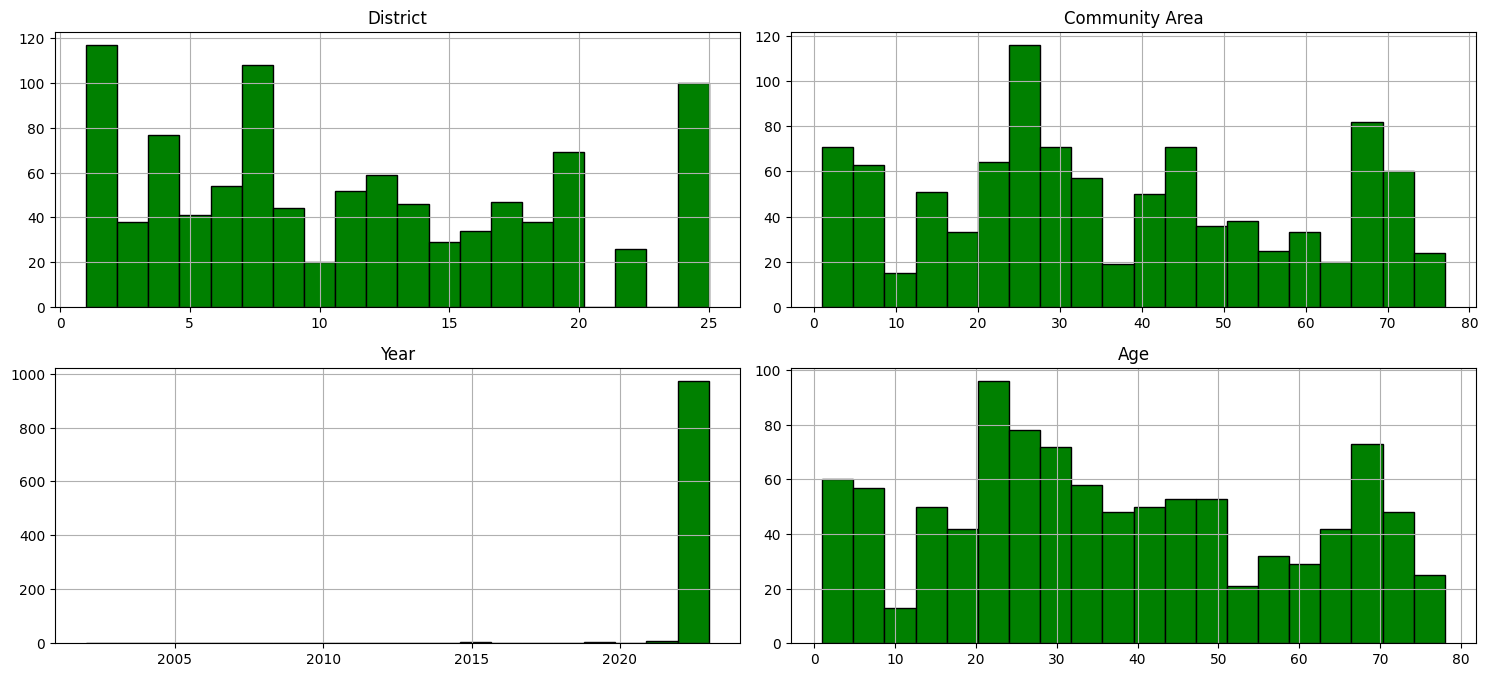

In [ ]:
df[columns].hist(bins=20, figsize=(15, 10), layout=(3, 2), edgecolor='black' , color='green')
plt.tight_layout()
plt.show()

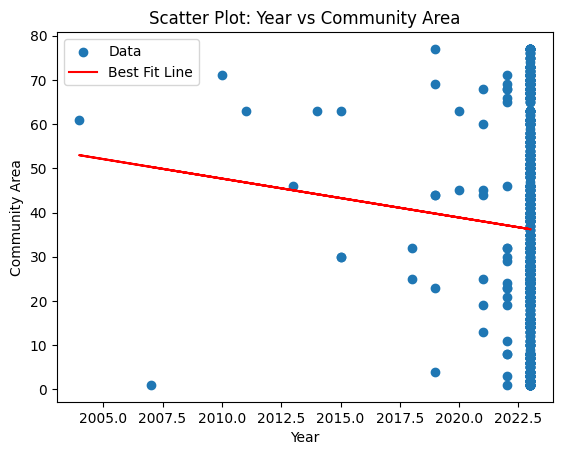

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = df.dropna()
plt.scatter(df['Year'], df['Community Area'], label='Data')
try:
    m, b = np.polyfit(df['Year'], df['Community Area'], 1)
    plt.plot(df['Year'], m*df['Year'] + b, color='red', label='Best Fit Line')
    plt.xlabel('Year')
    plt.ylabel('Community Area')
    plt.title('Scatter Plot: Year vs Community Area')
    plt.legend()
    plt.show()
except np.linalg.LinAlgError as e:
    print("Error:", e)



<Figure size 1700x800 with 0 Axes>

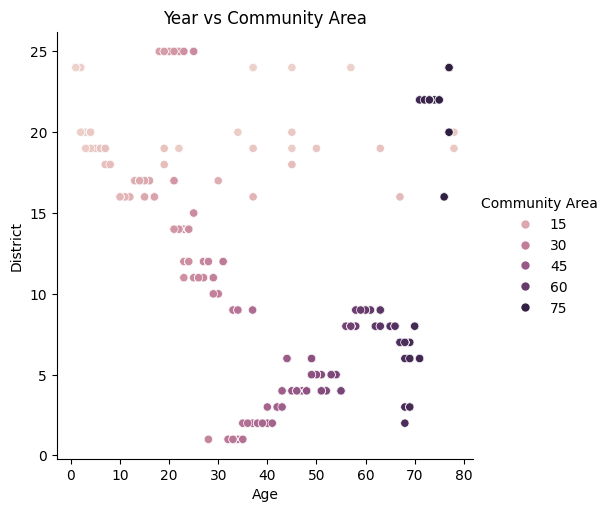

In [ ]:
plt.figure(figsize = (17, 8))
sns.relplot(x="Age", y="District", hue = "Community Area", data = df)
plt.title("Year vs Community Area")
plt.show()

Mean Squared Error: 412.91059374070943
R-squared: 0.0058689426235399855
Coefficients: [[-0.68260191]]
Intercept: [1417.17208467]


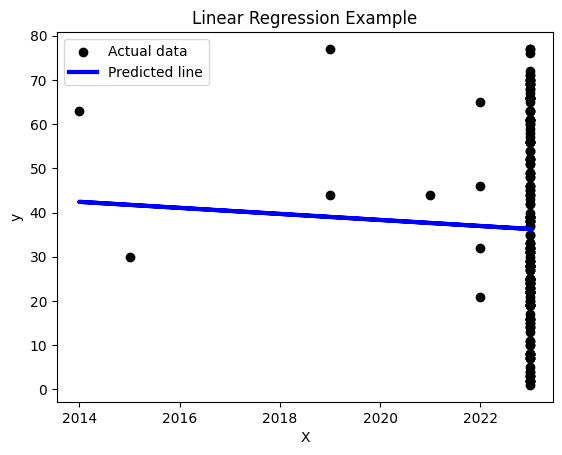

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression



x = df[['Year']]
y = df[['Community Area']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.legend()
plt.show()
